In [1051]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [1052]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [1053]:
#li2 is tokenized and cleaned version of words of the sentences

In [1054]:
li2[0]

['<name>',
 'know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part']

In [1055]:
oo = pd.DataFrame(li2)
df = pd.read_csv('data/tweet_emotions.csv')
oo['emotion']=df['sentiment']
oo

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,emotion
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,<name>,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,love
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,happiness


In [1056]:
# droping the duplicates
oon = oo.drop_duplicates()
oon

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,emotion
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,empty
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,sucesfuly,folowing,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,happiness
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,love
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,happiness


In [1057]:
ool = oon.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,<name>,know,listenin,bad,habit,earlier,start,freakin,part,None,...,None,None,None,None,None,None,None,None,None,None
1,layin,n,bed,headache,ugh,waitin,cal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,want,hang,friend,son,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,<name>,want,trade,someone,houston,ticket,one,wil,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,sucesfuly,folowing,tayla,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,hapy,mother,day,al,love,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,hapy,mother's,day,al,momies,woman,man,long,moma,someone,...,None,None,None,None,None,None,None,None,None,None
39998,<name>,wasup,beautiful,folow,pep,new,hit,single,w,myspace,...,None,None,None,None,None,None,None,None,None,None


In [1058]:
v = ool.values
v

array([['<name>', 'know', 'listenin', ..., None, None, None],
       ['layin', 'n', 'bed', ..., None, None, None],
       ['funeral', 'ceremony', 'glomy', ..., None, None, None],
       ...,
       ['hapy', "mother's", 'day', ..., None, None, None],
       ['<name>', 'wasup', 'beautiful', ..., None, None, None],
       ['<name>', 'bulet', 'train', ..., None, None, None]], dtype=object)

In [1059]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [1060]:
vo[0]

['<name>',
 'know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'start',
 'freakin',
 'part']

In [1061]:
seql = pd.Series([len(x) for x in vo])

In [1062]:
quant = seql.quantile([0.25,0.50,0.98])
quant

0.25     5.0
0.50     7.0
0.98    17.0
dtype: float64

In [1063]:
max_size = max(len(x) for x in vo)
max_size

27

In [1064]:
# as we can the 98% of sequence lengths falls under 17, but max length is 27
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 17 lenth and truncating remaining tokens will also lead to loss of data

In [1065]:
# so, we will try to padd the sequences to 17-19

### padding the sequences

In [1066]:
padded_sequences =[]
for i in vo:
    if(18-len(i)<0):
        j = i[:18]
        padded_sequences.append(j)
    else:
        j = i + (['<null>']*(18-len(i)))
        padded_sequences.append(j)

In [1067]:
len(padded_sequences)

39049

In [1068]:
x = padded_sequences
y = oon['emotion']

In [1069]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

13

In [1070]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [1071]:
xx = np.array(x)
yy = y.values

In [1072]:
xx.shape,yy.shape

((39049, 18), (39049,))

In [1073]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 10, 10, ...,  7,  5,  7])

In [1074]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y_int,test_size=0.4,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23429, 18) (23429,)
(15620, 18) (15620,)


In [1075]:
x_train[0],unique_class[y_train[0]]

(array(['sometimes', 'forget', 'boy', 'felings', '<null>', '<null>',
        '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
        '<null>', '<null>', '<null>', '<null>', '<null>', '<null>'],
       dtype='<U39'),
 'boredom')

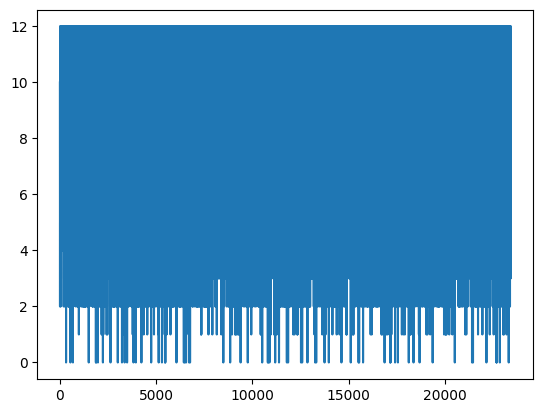

In [1076]:
plt.plot(y_train)

In [1077]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape) 

(7810, 18) (7810,)
(7810, 18) (7810,)


### Hybrid sampling

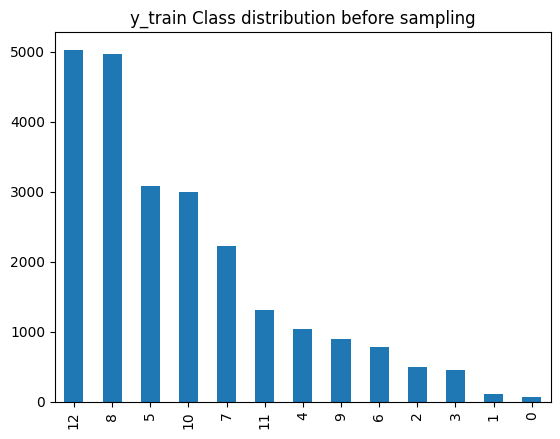

In [1078]:
class_dist = pd.Series(y_train).value_counts()
class_dist.plot(kind='bar')
plt.title("y_train Class distribution before sampling")
plt.show()

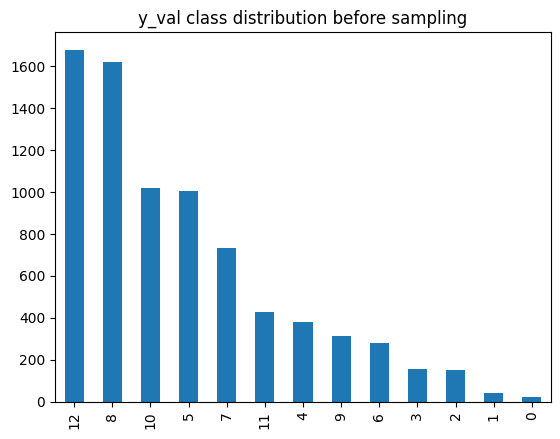

In [1079]:
class_y = pd.Series(y_val).value_counts()
class_y.plot(kind='bar')
plt.title("y_val class distribution before sampling")
plt.show()

In [1080]:
freq = pd.Series(y_train).value_counts()
freq

12    5029
8     4972
5     3075
10    2999
7     2219
11    1308
4     1042
9      896
6      777
2      491
3      448
1      104
0       69
Name: count, dtype: int64

In [1081]:
for i,j in enumerate(freq.items()):
    print(j[0],j[1])

12 5029
8 4972
5 3075
10 2999
7 2219
11 1308
4 1042
9 896
6 777
2 491
3 448
1 104
0 69


In [1082]:
freq1 = {}
freq2 = {}
for i,j in enumerate(freq.items()):
    if(j[0]==1):
        freq1[freq.index[i]]=300
    if(j[0]==0):
        freq1[freq.index[i]]=150
    if(j[0]==2 or j[0]==3):
        freq1[freq.index[i]]=600
    if(j[1]>3075):
        freq2[freq.index[i]]=3075
freq1,freq2

({2: 600, 3: 600, 1: 300, 0: 150}, {12: 3075, 8: 3075})

In [1083]:
freq0 = pd.Series(y_val).value_counts()
freq0

12    1677
8     1618
10    1018
5     1003
7      731
11     426
4      381
9      311
6      278
3      155
2      152
1       39
0       21
Name: count, dtype: int64

In [1084]:
freq11 = {}
freq22 = {}
for i,j in enumerate(freq0.items()):
    if(j[0]==0):
        freq11[freq0.index[i]]=70
    if(j[0]==1):
        freq11[freq0.index[i]]=150
    if(j[0]==2 or j[0]==3):
        freq11[freq0.index[i]]=200
    if(j[1]>1018):
        freq22[freq0.index[i]]=1018
freq11,freq22

({3: 200, 2: 200, 1: 150, 0: 70}, {12: 1018, 8: 1018})

In [1085]:
# there are many ways to balance the classes, 
# 1) as there is high imbalance in our data, we will try class_weights and check whether it is yielding good results
# 2) oversampling using smote and undersampling using randomsampler

In [1086]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)\nclass_weights = dict(enumerate(class_weights))\n"

In [1087]:
#oversampling using smote or Randomundersampler
#from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freq1, random_state=42)
X_res, y_res = oversample.fit_resample(x_train, y_train)

oversample1 = RandomOverSampler(sampling_strategy=freq11, random_state=42)
X_val, Y_val = oversample1.fit_resample(x_val,y_val) 

In [1088]:
# Note: Don't use smote for generating data for sensual data like tokenized words, because generating synthetic data could be non-sensical 

In [1089]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=freq2,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_res, y_res)

undersample1 = RandomUnderSampler(sampling_strategy=freq22,random_state=42)
X_val_resampled, y_val_resampled = undersample1.fit_resample(X_val, Y_val) 

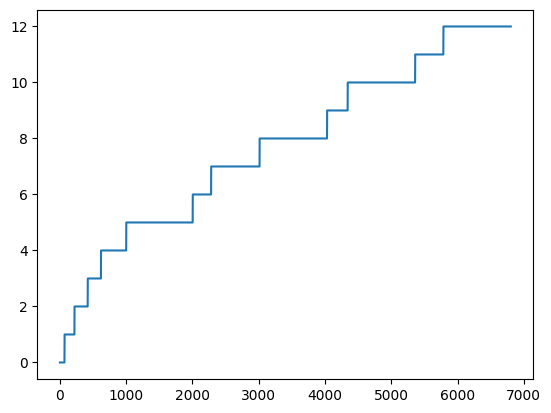

In [1090]:
plt.plot(y_val_resampled)

In [1093]:
from sklearn.utils import shuffle
X_train_resampled, y_train_resampled = shuffle(X_train_resampled,y_train_resampled,random_state=42)
X_val_resampled, y_val_resampled = shuffle(X_val_resampled, y_val_resampled,random_state=42)

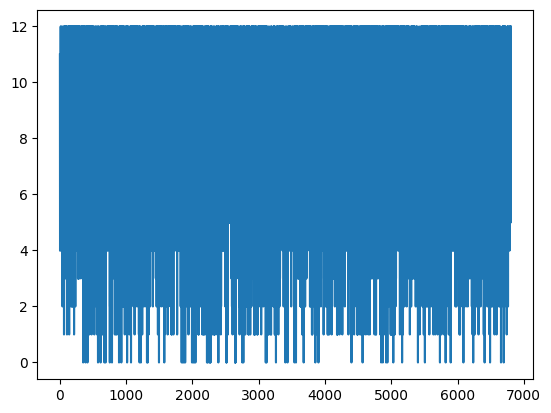

In [1094]:
plt.plot(y_val_resampled)

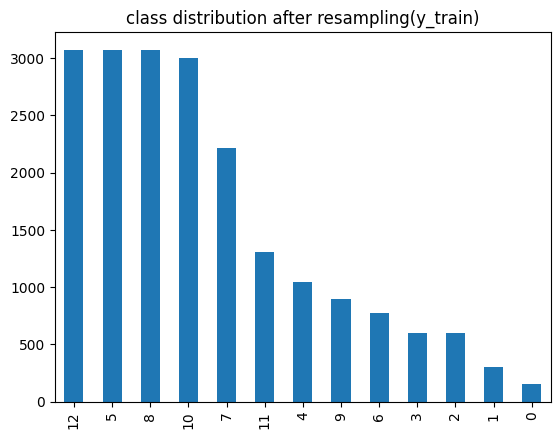

In [1095]:
class_dist = pd.Series(y_train_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_train)")
plt.show()

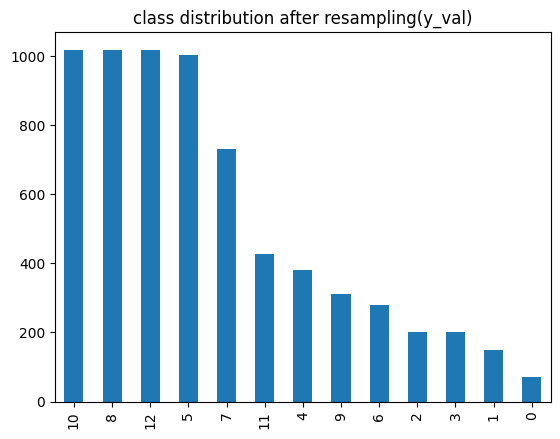

In [1096]:
class_dist = pd.Series(y_val_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_val)")
plt.show()

In [1097]:
pd.Series(y_train_resampled).value_counts()

12    3075
5     3075
8     3075
10    2999
7     2219
11    1308
4     1042
9      896
6      777
3      600
2      600
1      300
0      150
Name: count, dtype: int64

In [1098]:
pd.Series(y_val_resampled).value_counts() 

10    1018
8     1018
12    1018
5     1003
7      731
11     426
4      381
9      311
6      278
2      200
3      200
1      150
0       70
Name: count, dtype: int64

In [1099]:
# largesample/samplesample = k
# if k>5, high imbalance
# if k<5, mild imbalance

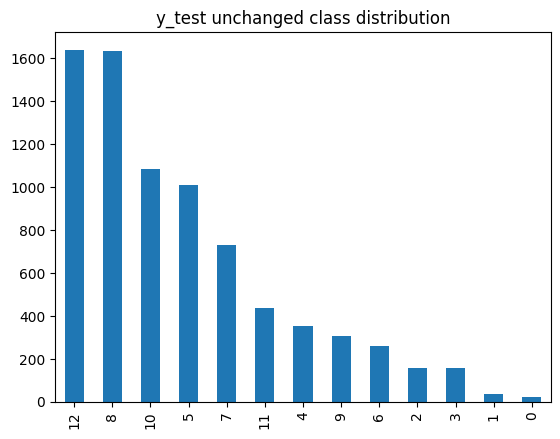

In [1100]:
class_dist = pd.Series(y_test).value_counts()
class_dist.plot(kind='bar')
plt.title("y_test unchanged class distribution")
plt.show()

In [1101]:
#Note: Generating more random samples may lead to overfitting

In [1102]:
x_train.shape,X_train_resampled.shape # we observe there is an decrease or increase in the sample

((23429, 18), (20116, 18))

In [1103]:
x_val.shape,X_val_resampled.shape # we observe there is an decrease or increase in the sample

((7810, 18), (6804, 18))

In [1104]:
#Note: Oversampling more will lead to redundancy in the data which may leads to overfitting
# Be cautious

In [1105]:
#len(X_train_resampled)-len(np.unique(X_train_resampled,axis=0)),len(X_val_resampled)-len(np.unique(X_val_resampled,axis=0))
# this indicates there are duplicates in the array

In [1106]:
df_train = pd.DataFrame(X_train_resampled)
df_train['emotion']=y_train_resampled
df_train 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,make,bring,u,sum,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
1,<name>,pange,ahahahahaha,two,could,meet,drink,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
2,love,get,gift,mail,wonderful,friend,back,home,mis,myrtle,beach,much,litle,homesick,today,<null>,<null>,<null>,7
3,ap,gov,exam,loked,stuf,month,what's,i'm,total,legal,nerd,know,case,like,none,oh,yeah,<null>,8
4,get,ned,leave,clas,hour,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111,<name>,lokin,god,mate,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
20112,love,music,video,belong,taylor,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
20113,i'm,jason,mraz,loking,electric,guitar,yay,1,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
20114,barely,awake,eat,breakfast,marathon,morning,god,luck,al,racer,hapy,mother's,day,<null>,<null>,<null>,<null>,<null>,5


In [1107]:
df_traino = df_train.drop_duplicates()
df_traino

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,make,bring,u,sum,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
1,<name>,pange,ahahahahaha,two,could,meet,drink,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
2,love,get,gift,mail,wonderful,friend,back,home,mis,myrtle,beach,much,litle,homesick,today,<null>,<null>,<null>,7
3,ap,gov,exam,loked,stuf,month,what's,i'm,total,legal,nerd,know,case,like,none,oh,yeah,<null>,8
4,get,ned,leave,clas,hour,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111,<name>,lokin,god,mate,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
20112,love,music,video,belong,taylor,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
20113,i'm,jason,mraz,loking,electric,guitar,yay,1,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
20114,barely,awake,eat,breakfast,marathon,morning,god,luck,al,racer,hapy,mother's,day,<null>,<null>,<null>,<null>,<null>,5


In [1108]:
df_val = pd.DataFrame(X_val_resampled)
df_val['emotion']=y_val_resampled
df_val

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,what's,deal,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,11
1,<name>,god,morning,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
2,<name>,night,girl,seriously,want,hear,story,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,4
3,<name>,sound,god,cleaning,cynic,order,haha,god,night,talk,tomorow,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
4,<name>,sigh,exam,aint,wer,near,finish,3,next,wek,bin,stresd,aint,guna,b,bak,til,end,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,hapy,mother's,day,like,poem,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
6800,<name>,aw,preciate,love,hunie,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
6801,leave,atlanta,morning,catch,joco,pa,amp,st,i'm,excite,mised,pamps,anger,last,year,make,sad,owl,10
6802,phone,die,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12


In [1109]:
df_valo = df_val.drop_duplicates()
df_valo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,<name>,what's,deal,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,11
1,<name>,god,morning,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
2,<name>,night,girl,seriously,want,hear,story,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,4
3,<name>,sound,god,cleaning,cynic,order,haha,god,night,talk,tomorow,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
4,<name>,sigh,exam,aint,wer,near,finish,3,next,wek,bin,stresd,aint,guna,b,bak,til,end,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,hapy,mother's,day,like,poem,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
6800,<name>,aw,preciate,love,hunie,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
6801,leave,atlanta,morning,catch,joco,pa,amp,st,i'm,excite,mised,pamps,anger,last,year,make,sad,owl,10
6802,phone,die,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12


In [1110]:
indexo = list(df_traino.index)
indexa = list(df_train.index)
indexd = []
for i in indexa:
    if(i not in indexo):
        indexd.append(i)

indexov = list(df_valo.index)
indexav = list(df_val.index)
indexdv = []
for i in indexav:
    if(i not in indexov):
        indexdv.append(i)

In [1111]:
len(indexd),len(indexdv)

(538, 253)

In [1112]:
df_traind = df_train.iloc[indexd]
df_traind

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
623,wake,day,ned,go,work,suck,also,go,dentist,file,12,st,helen,mri,scan,2,<null>,<null>,1
719,<name>,welcome,twiter,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
1269,wake,day,ned,go,work,suck,also,go,dentist,file,12,st,helen,mri,scan,2,<null>,<null>,1
1302,get,back,work,ot,na,naman,what's,new,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
1519,<name>,phone,whatchu,tonight,sucka,dane,cok,sell,ticket,lame,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20042,<name>,bore,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
20061,rush,get,ups,close,7,get,705,make,wrong,turn,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
20087,10min,brake,wrk,106,116,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
20098,eastenders,always,grim,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [1113]:
df_traind.value_counts()

0        1        2           3       4        5        6       7       8        9       10      11      12      13      14      15      16      17      emotion
sit      chevy    dealership  utah    wait     van      fix     <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          7
stick    nj       transit     past    twenty   minute   great   way     start    wek     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          6
wake     day      ned         go      work     suck     also    go      dentist  file    12      st      helen   mri     scan    2       <null>  <null>  1          5
<name>   yup      join        nin     ace      fun      <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          5
friday   tube     work        slow    <null>   <null>   <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
         

In [1114]:
df_vald = df_val.iloc[indexdv]
df_vald

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
443,<name>,i'm,20,heterochalenged,stil,care,quotmilkquot,think,bore,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
597,<name>,gues,get,dresed,prety,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
614,<name>,ack,read,show,that's,horible,acounting,taste,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
668,<name>,1pm,squeak,hel,squeak,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
774,<name>,nah,jkin,he's,hot,bored,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,woe,definitely,fun,travel,first,clas,bike,fight,way,7,coach,til,reach,seat,<null>,<null>,<null>,<null>,2
6696,download,new,font,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
6723,bgt,wil,gut,finish,tomorow,stavros,flatley,al,way,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
6741,agre,work,double,shift,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [1115]:
df_vald.value_counts()

0          1        2         3       4        5        6       7       8       9       10       11      12      13      14      15      16      17      emotion
<name>     u        serious   touch   arse     ohmygod  u       bitch   lol     u       tel      <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          6
           beast    enough    <null>  <null>   <null>   <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          6
boil       ofice    air       con     1        <null>   <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          6
realy      feling   like      man     cherish  wtf      <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          6
agre       work     double    shift   <null>   <null>   <null>  <null>  <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
         

In [1116]:
# now we found duplicate data from the resampled data
# And we will be applying augumentation techniques to it, to maintain the variability in the data

In [1117]:
X_train_resampled_dup = df_traind.iloc[:,:-1].values.tolist()
y_train_resampled_dup = df_traind.iloc[:,-1]
X_val_resampled_dup = df_vald.iloc[:,:-1].values.tolist()
y_val_resampled_dup = df_vald.iloc[:,-1]

In [1118]:
# leave them as numpy array
X_train_resampled_o = df_traino.iloc[:,:-1]
y_train_resampled_o = df_traino.iloc[:,-1]
X_val_resampled_o = df_valo.iloc[:,:-1]
y_val_resampled_o = df_valo.iloc[:,-1]

In [1119]:
print(len(X_train_resampled_o),"+",len(X_train_resampled_dup),len(X_train_resampled))
print(len(y_train_resampled_o),"+",len(y_train_resampled_dup),len(y_train_resampled))
print(len(X_val_resampled_o),"+",len(X_val_resampled_dup),len(X_val_resampled))
print(len(y_val_resampled_o),"+",len(y_val_resampled_dup),len(y_val_resampled))

19578 + 538 20116
19578 + 538 20116
6551 + 253 6804
6551 + 253 6804


In [1120]:
# Now our data looks kinda balanced

# Note: the highest classes frequency shouldn't be more than 5 times more than the lowest class frequency, otherwise it is high imbalance, 
# >5 high imbalance,<5 moderate imbalance, <3 balance

In [1121]:
# As we see there is lot of increase in the sample, as random samples increase the size the duplicating the data
# So, to mitigate it, we will do data agumentation like replacing the words with similar meaning word to increase the variablility in the data

### Data Agumentation (only for duplicate data)

In [1122]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1144]:
from nltk.corpus import wordnet
import random
word = 'amp'
synonyms = wordnet.synsets(word)
synonyms

[Synset('ampere.n.02'), Synset('adenosine_monophosphate.n.01')]

In [1124]:
# Replacing the words with thier synonyms

In [1125]:
from nltk.corpus import wordnet
import random


# method1 (manually replacing words using nltk)

exceptions = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As']
def augument(words):
    lii = []
    for word in words:
        li =[]
        synonyms = wordnet.synsets(word)
        if(len(synonyms)!=0 and word not in exceptions):
            for i in range(len(synonyms)):
                synonym = synonyms[i].lemmas()[0].name()
                if(synonym!=word):
                    li.append(synonym)
            if(len(li)!=0):
                lii.append(random.choice(li)) 
            else: lii.append(word)
        else:
            lii.append(word)
    return lii


"""
# method2 (using nlpaug library)
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
#Initialize the augmenter for synonym replacement
stopwords = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As','<null>','[name]']
synonym_aug = naw.SynonymAug(aug_src='wordnet',stopwords=stopwords)

def augument(words):
    str = " ".join(words)
    syn = synonym_aug.augment(str)
    return syn[0].split()
"""

x_train_augument = []
x_val_augument = []
for i in range(len(X_train_resampled_dup)):
    tempx = augument(X_train_resampled_dup[i])
    x_train_augument.append(tempx)
    
for i in range(len(X_val_resampled_dup)):
    tempxv = augument(X_val_resampled_dup[i])
    x_val_augument.append(tempxv)

In [1126]:
len(x_train_augument),len(x_val_augument)

(538, 253)

In [1127]:
# Repeating synonymn replacement

x_train_augument1 = []
x_val_augument1 = []
for i in range(len(x_train_augument)):
    tempx = augument(x_train_augument[i])
    x_train_augument1.append(tempx)
    
for i in range(len(x_val_augument)):
    tempxv = augument(x_val_augument[i])
    x_val_augument1.append(tempxv)

In [1128]:
"""
insertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path='bert-base-uncased',top_k=5,stopwords=stopwords)
sample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")
sample
"""

'\ninsertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path=\'bert-base-uncased\',top_k=5,stopwords=stopwords)\nsample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")\nsample\n'

In [1129]:
"""
import re
import concurrent.futures
import nlpaug.augmenter.word as naw

# Define the augmentation and cleaning function
def augment_and_clean(sentence):
    augmented_sentence = insertion_aug.augment(" ".join(sentence))
    return func(augmented_sentence[0])[0].split()

def func(x):
    li = []
    x = re.sub(r'([?!.,])\1+', r'\1', x)
    x = re.sub(r'[^a-zA-Z0-9\s\!\?\,\@\']','',x)
    x = re.sub(r'\w*null | tested |\s*test| \s*non','',x)
    x = re.sub(r'\s*UNK',' [name]',x)
    li.append(x)
    return li

# List of sentences to augment
x_train_augument1 = []

# Run in parallel with a thread pool
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(augment_and_clean, x_train_augument))

x_train_augument1.extend(results)
"""

'\nimport re\nimport concurrent.futures\nimport nlpaug.augmenter.word as naw\n\n# Define the augmentation and cleaning function\ndef augment_and_clean(sentence):\n    augmented_sentence = insertion_aug.augment(" ".join(sentence))\n    return func(augmented_sentence[0])[0].split()\n\ndef func(x):\n    li = []\n    x = re.sub(r\'([?!.,])\x01+\', r\'\x01\', x)\n    x = re.sub(r\'[^a-zA-Z0-9\\s\\!\\?\\,\\@\']\',\'\',x)\n    x = re.sub(r\'\\w*null | tested |\\s*test| \\s*non\',\'\',x)\n    x = re.sub(r\'\\s*UNK\',\' [name]\',x)\n    li.append(x)\n    return li\n\n# List of sentences to augment\nx_train_augument1 = []\n\n# Run in parallel with a thread pool\nwith concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:\n    results = list(executor.map(augment_and_clean, x_train_augument))\n\nx_train_augument1.extend(results)\n'

In [1130]:
# swapping the words 

In [1131]:
import nlpaug.augmenter.word as naw

def custom_tokenizer(text):
    # Merge contractions
    text = re.sub(r"(\w)'(\w)", r"\1'\2", text)
    text = re.sub(r'\[name]','[name]',text)
    tokens = text.split()
    return tokens
    
swap_aug = naw.RandomWordAug(action="swap",tokenizer=custom_tokenizer)
swap_aug.augment("i [name] love eating mushrooms and samosas in the beach and it's very hot ")

["i [name] love mushrooms eating and samosas beach the in and it's hot very"]

In [1132]:
# swapping the words in the sentences for more variability

def swap(sentences):
    ll =[]
    for words in sentences:
        str=""
        for i,j in enumerate(words):
            if(i==0):
                str+=j
            else:
                if(j!='<null>'):
                    str+=" "+j
                else: break 
        ss=swap_aug.augment(str)
        ss = ss[0]
        ll.append(ss.split())
    return ll

x_train_augument1 = swap(x_train_augument1)
x_val_augument1 = swap(x_val_augument1)

In [1133]:
# swapping agian 
x_train_augument1 = swap(x_train_augument1)
x_val_augument1= swap(x_val_augument1)

In [1134]:
print(x_train_augument[100])

['<name>', 'sleep_together', 'male_child', 'mised', 'Old_World_chat', 'yesterday', 'firts', 'adenosine_monophosphate', 'matchless', "i'l", 'nautical_mile', 'though', 'lt3', 'notch', 'jonas', 'lt3', '<null>', '<null>']


In [1135]:
print(x_train_augument1[100])

['Male_child', '<name>', 'Old_World_chat', 'sleep_together', 'mised', 'yesterday', 'firts', 'matchless', "i'l", 'adenosine_monophosphate', 'though', 'nautical_mile', 'lt3', 'pass', 'lt3', 'jonas']


In [1136]:
print(x_val_augument[12])

['<name>', 'nope', 'estimate', "i've", 'cash_register', 'Army_for_the_Liberation_of_Rwanda', 'reply', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [1145]:
print(x_val_augument1[12])

['nope', '<name>', 'calculate', "i've", 'answer', 'Army_for_the_Liberation_of_Rwanda', 'cash_register']


In [1146]:
x_train_augument1 = [i + ['<null>']*(len(x_train_augument[0])-len(i)) for i in x_train_augument1]
x_val_augument1 = [i + ['<null>']*(len(x_val_augument[0])-len(i)) for i in x_val_augument1]

In [1147]:
# reframing them to dataframe to see the value_counts

In [1148]:
len(x_train_augument1),len(y_train_resampled_dup)

(538, 538)

In [1149]:
len(x_val_augument1),len(y_val_resampled_dup)

(253, 253)

In [1150]:
df_train_final = pd.DataFrame(x_train_augument1)
df_train_final['emotion'] = list(y_train_resampled_dup)
df_val_final = pd.DataFrame(x_val_augument1)
df_val_final['emotion']=  list(y_val_resampled_dup)

In [1151]:
df_train_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,emotion
0,Consequence,day,ned,workplace,locomotion,fellate,be_active,besides,dentist,twelve,bang,Helen,st,deuce,magnetic_resonance_imaging,understand,<null>,<null>,1
1,twiter,<name>,welcome,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
2,ned,Wake_Island,sidereal_day,act,overwork,besides,voice,suck,twelve,dentist,st,magnetic_resonance_imaging,accusation,understand,Helen,deuce,<null>,<null>,1
3,capture,bet_on,ot,use,naman,sodium,what's,clean,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
4,bid,tonight,<name>,whatchu,sucka,cok,Dane,cheat_on,chase,faint,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [1152]:
df_train_final.value_counts().head(20)

0                       1          2            3               4            5            6                       7                       8         9             10       11      12         13         14      15      16      17      emotion
dres                    alike      patricia's   <null>          <null>       <null>       <null>                  <null>                  <null>    <null>        <null>   <null>  <null>     <null>     <null>  <null>  <null>  <null>  3          2
130am                   goin       slep         <null>          <null>       <null>       <null>                  <null>                  <null>    <null>        <null>   <null>  <null>     <null>     <null>  <null>  <null>  <null>  2          2
<name>                  wot        <null>       <null>          <null>       <null>       <null>                  <null>                  <null>    <null>        <null>   <null>  <null>     <null>     <null>  <null>  <null>  <null>  2          2
                     

In [1153]:
"""
temp1 = np.array(df_train_final[df_train_final[0]=='confuzled'].head(1))
temp4 = np.array(df_train_final[df_train_final[0]=='Sleep_together'].head(1))
temp2 = np.array(df_train_final[df_train_final[1]=="shesh"].head(1))
temp3 =  np.array(df_train_final[df_train_final[0]=="Motherfuck"].head(1))
temp5 =  np.array(df_train_final[df_train_final[1]=="bo"].head(1))
"""

'\ntemp1 = np.array(df_train_final[df_train_final[0]==\'confuzled\'].head(1))\ntemp4 = np.array(df_train_final[df_train_final[0]==\'Sleep_together\'].head(1))\ntemp2 = np.array(df_train_final[df_train_final[1]=="shesh"].head(1))\ntemp3 =  np.array(df_train_final[df_train_final[0]=="Motherfuck"].head(1))\ntemp5 =  np.array(df_train_final[df_train_final[1]=="bo"].head(1))\n'

In [ ]:
"""
df_train_final = df_train_final[df_train_final[0]!='confuzled']
df_train_final = df_train_final[df_train_final[0]!="Sleep_together"]
df_train_final = df_train_final[df_train_final[1]!="shesh"]
df_train_final = df_train_final[df_train_final[1]!="bo"]
df_train_final = df_train_final[df_train_final[0]!="sleep_together"]
df_train_final = df_train_final[df_train_final[0]!="Motherfuck"]
"""

In [1155]:
df_train_final.value_counts().head()

0       1       2           3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
dres    alike   patricia's  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  3          2
130am   goin    slep        <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
<name>  wot     <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
        totaly  agre        <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  3          2
        helo    <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
Name: count, dtype: int64

In [1156]:
#temp = [temp1,temp2,temp3,temp4,temp5]

In [1157]:
"""
for i in temp:
    df_train_final = pd.concat([df_train_final,pd.DataFrame(i,columns=df_train_final.columns)])
"""

'\nfor i in temp:\n    df_train_final = pd.concat([df_train_final,pd.DataFrame(i,columns=df_train_final.columns)])\n'

In [1164]:
len(df_train_final)

536

In [1165]:
len(df_val_final)

253

In [1166]:
df_val_final.value_counts().head(20)

0                        1             2               3              4           5                       6        7                8          9             10       11                       12         13      14      15      16      17      emotion
<name>                   animal        adequate        <null>         <null>      <null>                  <null>   <null>           <null>     <null>        <null>   <null>                   <null>     <null>  <null>  <null>  <null>  <null>  1          5
                         react         <null>          <null>         <null>      <null>                  <null>   <null>           <null>     <null>        <null>   <null>                   <null>     <null>  <null>  <null>  <null>  <null>  0          3
rent                     <null>        <null>          <null>         <null>      <null>                  <null>   <null>           <null>     <null>        <null>   <null>                   <null>     <null>  <null>  <null>  <null>  <null>

In [1167]:
#temp12 = np.array(df_val_final[df_val_final[1]=='react'].head(1))

In [1169]:
#df_val_final = df_val_final[df_val_final[1]!="suffice"]

In [1170]:
df_val_final.value_counts().head()

0                       1             2         3        4       5       6       7       8       9       10      11      12      13      14      15      16      17      emotion
<name>                  animal        adequate  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          5
                        react         <null>    <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          3
rent                    <null>        <null>    <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
Software_documentation  sidereal_day  <null>    <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          2
doubly                  agre          false     stagger  <null>  <null>  <null>  <null>  <null>

In [1171]:
#df_val_final = pd.concat([df_val_final,pd.DataFrame(temp12,columns=df_val_final.columns)])

In [1172]:
len(df_val_final)

253

In [1173]:
# Now we can see that there are all unique values, no duplicacy is found in the data

In [1174]:
xtarg = df_train_final.iloc[:,:-1].values
ytarg = df_train_final.iloc[:,-1].values
xvarg = df_val_final.iloc[:,:-1].values
yvarg = df_val_final.iloc[:,-1].values

In [1175]:
print(X_train_resampled_o.shape,xtarg.shape)
print(y_train_resampled_o.shape,ytarg.shape)
print(X_val_resampled_o.shape,xvarg.shape)
print(y_val_resampled_o.shape,yvarg.shape) 

(19578, 18) (536, 18)
(19578,) (536,)
(6551, 18) (253, 18)
(6551,) (253,)


In [1176]:
X_train_resampled_m=np.vstack([X_train_resampled_o,xtarg])
y_train_resampled_m = np.hstack([y_train_resampled_o,ytarg])
X_val_resampled_m = np.vstack([X_val_resampled_o,xvarg])
y_val_resampled_m = np.hstack([y_val_resampled_o,yvarg])

In [1187]:
y_train_resampled_m

array([12,  5,  7, ...,  1,  1,  1], dtype=int64)

In [1188]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(23429, 18) (23429,)
(7810, 18) (7810,)


In [1189]:
print(X_train_resampled_m.shape,y_train_resampled_m.shape)
print(X_val_resampled_m.shape,y_val_resampled_m.shape)

(20114, 18) (20114,)
(6804, 18) (6804,)


In [1190]:
def arraytolist(arr):
    li =[]
    for i in arr:
        li.append(list(i))
    return li

Xtl = arraytolist(X_train_resampled_m)
xvl = arraytolist(X_val_resampled_m)
xl = arraytolist(x_test)

In [1191]:
z =[]
z.extend(Xtl)
z.extend(xvl)
z.extend(xl)
len(z)

34728

In [1192]:
print(z[0])

['<name>', 'make', 'bring', 'u', 'sum', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [1193]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)
encoded = tokenizer.texts_to_sequences(z)

In [1194]:
print(encoded[0])

[2, 19, 366, 13, 1155, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [1195]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('<name>', 2), ('get', 3), ('go', 4), ('day', 5), ("i'm", 6), ('god', 7), ('al', 8), ('love', 9), ('work', 10), ('like', 11), ('today', 12), ('u', 13), ('time', 14), ('lol', 15), ('know', 16), ('think', 17), ('one', 18), ('make', 19), ('hapy', 20), ('im', 21), ('want', 22), ('back', 23), ('wil', 24), ('realy', 25), ('se', 26), ('oh', 27), ("can't", 28), ('night', 29), ('new', 30), ('home', 31), ('wel', 32), ('come', 33), ('amp', 34), ('2', 35), ('stil', 36), ('thanks', 37), ('much', 38), ('great', 39), ('say', 40), ('watch', 41), ('haha', 42), ('last', 43), ('wish', 44), ('ben', 45), ('ned', 46), ('hope', 47), ('morning', 48), ('fel', 49), ('fun', 50), ('twiter', 51), ('bad', 52), ('sad', 53), ('tomorow', 54), ('wait', 55), ('would', 56), ('try', 57), ('tonight', 58), ('thing', 59), ('nice', 60), ('right', 61), ('sory', 62), ("i'l", 63), ('gona', 64), ('mis', 65), ('yeah', 66), ('take', 67), ('though', 68), ('beter', 69), ('slep', 70), ('mother', 71), ('frien

In [1196]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

25741

In [1197]:
# after NER and augumentation, the number of unique words reduced from to 25913 , which significantly reduces overfitting of the model
# and good scope for generalization

### word vectors

In [1198]:
# we will be using pretrained Glove to create word vectors for our sequences
# the file is downloaded locally, and we will find the corressponding word vector by mapping our words with it

In [1199]:
# Load the GloVe embeddings
"""
import numpy as np
embedding_index = {}
embedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences

with open('D:/ds/dl/rnn/archive/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape) 
"""

'\nimport numpy as np\nembedding_index = {}\nembedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences\n\nwith open(\'D:/ds/dl/rnn/archive/glove.6B.100d.txt\', encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coefs\n\n# Create the embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector\n\nprint("Embedding matrix shape:", embedding_matrix.shape) \n'

In [1200]:
# we will be using word2vec to train on our custom words and generate word vectors
# because glove may not containa all the word vectors, where the words will be unique to our data 

In [1201]:
print(z[4])

['get', 'ned', 'leave', 'clas', 'hour', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [1202]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=z, vector_size=200, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [1203]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv["sad"]
word_vector

array([ 0.6053521 , -0.22701827, -0.35230097,  0.23044749,  1.1519327 ,
       -0.08567597, -0.33992353,  0.8323222 ,  0.11436658,  0.5212206 ,
       -0.5994451 , -0.25294518,  0.23707813,  0.37768167,  0.12538831,
       -0.16229156, -0.46739897,  0.36832875,  0.3747527 , -0.731212  ,
        0.04586066, -0.72201777, -0.21416724,  0.4631716 , -0.57373834,
        0.08122209,  0.29881725, -0.4571554 ,  0.07314499,  0.29459348,
        1.0593117 ,  0.01843834,  0.15884553, -0.07243757, -0.12989324,
       -0.04554213,  0.28263873, -0.01171986, -0.3833931 , -0.20304516,
        0.1393902 , -0.64942896,  0.77095604, -0.09672844,  0.48312625,
       -0.4201287 ,  0.2547757 , -0.70908976,  0.07244352,  0.7692798 ,
        0.1674604 , -0.40454397,  0.20528841, -0.21164997, -0.15675761,
       -0.05772382, -0.09237014, -0.39941788, -0.45007914, -0.24263313,
       -0.06799623, -0.10542226,  0.38876995,  0.15855125, -0.6718316 ,
        0.06408227, -0.04156401,  0.7977505 , -0.4875606 ,  0.29

In [1204]:
len(word_vector)

200

In [1205]:
import random
embedding_matrix = np.zeros((vocab_size, 200))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = [random.uniform(-3, 3) for i in range(200)]
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.25239849e-01,  4.48619649e-02, -8.64922330e-02, ...,
        -5.76719403e-01,  3.74788374e-01, -3.05911630e-01],
       [ 8.65966499e-01, -2.43957445e-01, -8.56075108e-01, ...,
        -2.01135173e-01,  8.76973152e-01, -1.02334177e+00],
       ...,
       [ 1.04447939e-02,  3.66804795e-03, -8.56553670e-03, ...,
         2.06224737e-03,  1.81234591e-02, -5.81691042e-03],
       [-3.27534298e-03, -2.32724845e-03, -2.17146892e-03, ...,
         4.76556551e-03,  1.03090731e-02, -1.48597604e-03],
       [-8.59713007e-04,  2.41578068e-03, -4.79682442e-03, ...,
         1.67052615e-02,  2.74209548e-02, -3.29683069e-03]])

In [1206]:
embedding_matrix.shape

(25741, 200)

In [1207]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [1208]:
len(encoded)

34728

In [1209]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(20114, 6804)

In [1210]:
ll = l1+l2
ll

26918

In [1211]:
ll-l2 

20114

In [1212]:
len(encoded)-ll # y_test length

7810

In [1213]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [1214]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [1215]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=13)
y_test_hot = to_categorical(y_test,num_classes=13)
y_val_hot = to_categorical(y_val_resampled_m,num_classes=13)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((20114, 13), (6804, 13), (7810, 13))

In [1216]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(20114, 18) (20114, 13)
(6804, 18) (6804, 13)
(7810, 18) (7810, 13)


In [1217]:
x_train_final

array([[    2,    19,   366, ...,     1,     1,     1],
       [    2, 10570, 10571, ...,     1,     1,     1],
       [    9,     3,   607, ...,     1,     1,     1],
       ...,
       [ 6829,  2906,  9878, ...,     1,     1,     1],
       [ 3682,  1058,  8199, ...,     1,     1,     1],
       [19358,   146,  2689, ...,     1,     1,     1]])

In [1218]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [1219]:
x_train_final

array([[    9,    82,     1, ...,     1,     1,     1],
       [    2,   627,    95, ..., 12921,     1,     1],
       [   54,    24,    43, ...,     1,     1,     1],
       ...,
       [    7,    14,   330, ...,  6323,  1235,     1],
       [  690,    21,     4, ...,     1,     1,     1],
       [ 5491,   246,     1, ...,     1,     1,     1]])

In [1220]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

In [1221]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) 
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) \nclass_weight_dict = dict(enumerate(class_weights))\nclass_weight_dict\n"

### DL model

In [1222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten, MultiHeadAttention
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200, weights=[embedding_matrix],trainable=False))

model.add(Bidirectional(GRU(64,return_sequences=True)))
model.add(Bidirectional(GRU(32,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer=l2(0.004))) 
model.add(LeakyReLU(0.3)) # to avoid dead neurons
model.add(LayerNormalization()) 
model.add(Dropout(0.3))
model.add(Dense(64,kernel_regularizer=l2(0.004))) 
model.add(LeakyReLU(0.2)) 
model.add(LayerNormalization()) 
model.add(Dropout(0.3))


model.add(Dense(num_classes,activation='softmax')) 

In [1225]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['precision']) # categorical_crossentropy for one-hot encoded lables

In [ ]:
history = model.fit(x_train_final,y_train_hot,epochs=20,batch_size=32,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - loss: 2.1109 - precision: 0.5943 - val_loss: 2.1387 - val_precision: 0.6812
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - loss: 2.0998 - precision: 0.5848 - val_loss: 2.1469 - val_precision: 0.5809
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 2.0856 - precision: 0.5888 - val_loss: 2.1427 - val_precision: 0.6526
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0864 - precision: 0.5831

In [623]:
# Layernormalization - Feautre wise normalization instead of batch wise 
# Keep values in standard range which increases the speed of computation 

In [624]:
type(history)

keras.src.callbacks.history.History

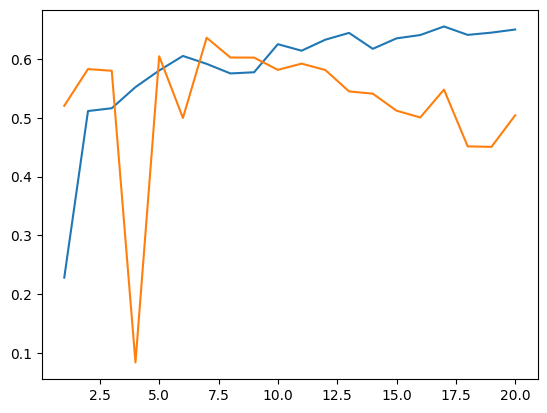

In [1033]:
plt.plot([i for i in range(1,21)],history.history['precision'])
plt.plot([i for i in range(1,21)],history.history['val_precision'])
plt.show()

In [1042]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ (None, 18, 200)        │     5,182,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_44                │ (None, 18, 256)        │       253,440 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_45                │ (None, 18, 128)        │       123,648 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_54          │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_55          │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,227,441 (27.57 MB)

 Trainable params: 681,613 (2.60 MB)

 Non-trainable params: 5,182,600 (19.77 MB)

 Optimizer params: 1,363,228 (5.20 MB)

In [1036]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [1037]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_testt)

245/245 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step


In [1038]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [1039]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='macro')
recall = recall_score(y_pred,y_test, average='macro')
f1 = f1_score(y_pred,y_test,average='macro')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1041]:
acc,precision,recall,f1

(0.282202304737516,
 0.13480743271326362,
 0.1301121519070985,
 0.1227379520763602)